### Introduction
         This notebook explores a dataset containing loan information of approximately 113,937 loans. The dataset being used for this project is the Prosper loan Dataset, provided by Udacity.
        

### Preliminary Analysis

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

Loading the dataset to describe its properties below.

In [5]:
loan = pd.read_csv('prosperLoanData.csv')
loan.shape

(113937, 81)

In [7]:
#loadig first 5 records
loan.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [8]:
#showing info on columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
# descriptive statistics for numeric variables
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of the dataset?
The dataset comprises of 113,937 loan records with 81 features.

### What is/are the main feature(s) of interest in your dataset?
The main features of interest are the the insights related to the borrowers and the loans they took.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. MemberKey:The unique key that is associated with the borrower. This is the same identifier that is used in the API member object.
2. EmploymentStatus:The employment status of the borrower at the time they posted the listing.
3. Occupation:The Occupation selected by the Borrower at the time they created the listing.
4. IncomeVerifiable:The borrower indicated they have the required documentation to support their income.
5. StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
6. IncomeRange: The income range of the borrower at the time the listing was created.
7. BorrowerAPR:The Borrower's Annual Percentage Rate (APR) for the loan.
8. BorrowerRate:The Borrower's interest rate for this loan.
9. BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
10. DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
11. IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
12. CreditScoreRangeLower: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
13. CreditScoreRangeUpper: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

* These are features related to the loans they took:
14. LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
15. LoanKey: Unique key for each loan. This is the same key that is used in the API.
16. Term: The length of the loan expressed in months.
17. LoanOriginationDate: The date the loan was originated.
18. LoanOriginationQuarter: The quarter in which the loan was originated.
19. TotalProsperLoans: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.
20. LoanOriginalAmount: The origination amount of the loan.

### Univariate Exploration
   In this section, I will be investigating distributions of individual variables.

In [12]:
# Subset the dataframe by selecting features of interest
cols =['MemberKey','EmploymentStatus', 'Occupation','IncomeVerifiable','StatedMonthlyIncome', 'IncomeRange','BorrowerAPR','BorrowerRate','BorrowerState','DebtToIncomeRatio','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','LoanStatus','LoanKey','LoanOriginalAmount','LoanOriginationDate','LoanOriginationQuarter','Term', 'TotalProsperLoans']
loan_sub = loan[cols]
loan_sub.head()

,MemberKey,EmploymentStatus,Occupation,IncomeVerifiable,StatedMonthlyIncome,IncomeRange,BorrowerAPR,BorrowerRate,BorrowerState,DebtToIncomeRatio,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,LoanStatus,LoanKey,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,Term,TotalProsperLoans
0,1F3E3376408759268057EDA,Self-employed,Other,True,3083.333333,"$25,000-49,999",0.16516,0.1580,CO,0.17,True,640.0,659.0,Completed,E33A3400205839220442E84,9425,2007-09-12 00:00:00,Q3 2007,36,NaN
1,1D13370546739025387B2F4,Employed,Professional,True,6125.000000,"$50,000-74,999",0.12016,0.0920,CO,0.18,False,680.0,699.0,Current,9E3B37071505919926B1D82,10000,2014-03-03 00:00:00,Q1 2014,36,NaN
2,5F7033715035555618FA612,Not available,Other,True,2083.333333,Not displayed,0.28269,0.2750,GA,0.06,False,480.0,499.0,Completed,6954337960046817851BCB2,3001,2007-01-17 00:00:00,Q1 2007,36,NaN
3,9ADE356069835475068C6D2,Employed,Skilled Labor,True,2875.000000,"$25,000-49,999",0.12528,0.0974,GA,0.15,True,800.0,819.0,Current,A0393664465886295619C51,10000,2012-11-01 00:00:00,Q4 2012,36,NaN
4,36CE356043264555721F06C,Employed,Executive,True,9583.333333,"$100,000+",0.24614,0.2085,MN,0.26,True,680.0,699.0,Current,A180369302188889200689E,15000,2013-09-20 00:00:00,Q3 2013,36,1.0


In [13]:
# viewing the statistics
loan_sub.describe()

,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,DebtToIncomeRatio,CreditScoreRangeLower,CreditScoreRangeUpper,LoanOriginalAmount,Term,TotalProsperLoans
count,1.139370e+05,113912.000000,113937.000000,105383.000000,113346.000000,113346.000000,113937.00000,113937.000000,22085.000000
mean,5.608026e+03,0.218828,0.192764,0.275947,685.567731,704.567731,8337.01385,40.830248,1.421100
std,7.478497e+03,0.080364,0.074818,0.551759,66.458275,66.458275,6245.80058,10.436212,0.764042
min,0.000000e+00,0.006530,0.000000,0.000000,0.000000,19.000000,1000.00000,12.000000,0.000000
25%,3.200333e+03,0.156290,0.134000,0.140000,660.000000,679.000000,4000.00000,36.000000,1.000000
50%,4.666667e+03,0.209760,0.184000,0.220000,680.000000,699.000000,6500.00000,36.000000,1.000000
75%,6.825000e+03,0.283810,0.250000,0.320000,720.000000,739.000000,12000.00000,36.000000,2.000000
max,1.750003e+06,0.512290,0.497500,10.010000,880.000000,899.000000,35000.00000,60.000000,8.000000


''

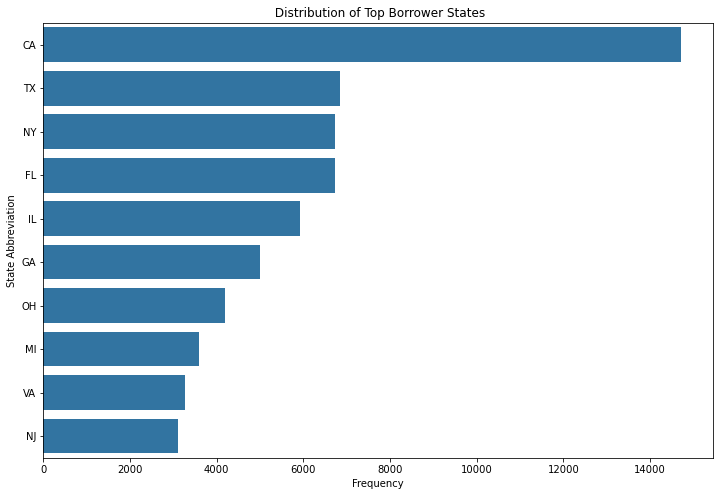

In [14]:
#looking at borrower's demography to see distribution across top 10 States 
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
order = loan_sub['BorrowerState'].value_counts().iloc[:10].index
sb.countplot(data= loan_sub, y= 'BorrowerState', color = color_pal, order = order)
plt.title(" Distribution of Top Borrower States")
plt.xlabel("Frequency")
plt.ylabel("State Abbreviation")
;

* California abbreviated as CA has the highest distribution

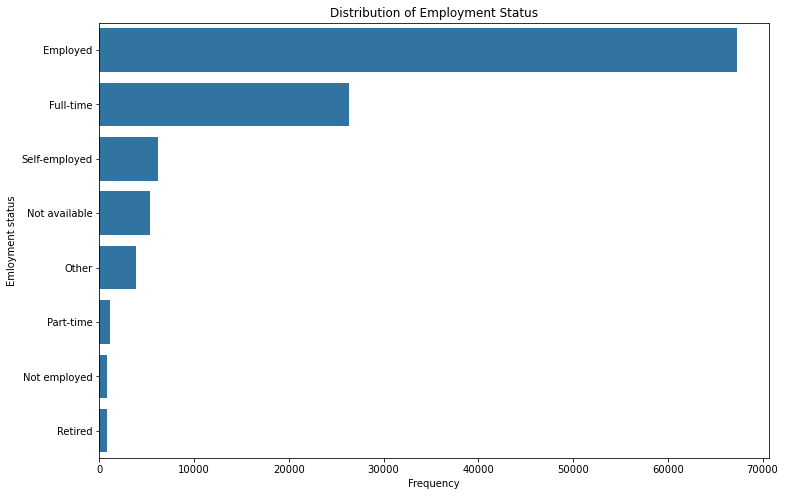

In [15]:
#checking the Borrower's employment info
# Creating an horizontal barchart to show the distribution of the borrowers across the EmploymentStatus categories
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
order_type = loan_sub['EmploymentStatus'].value_counts().index
sb.countplot(data= loan_sub, y= 'EmploymentStatus', color = color_pal, order = order_type)
plt.title("Distribution of Employment Status")
plt.xlabel("Frequency")
plt.ylabel("Emloyment status");

* Most of borrowers are employed and full-time.

''

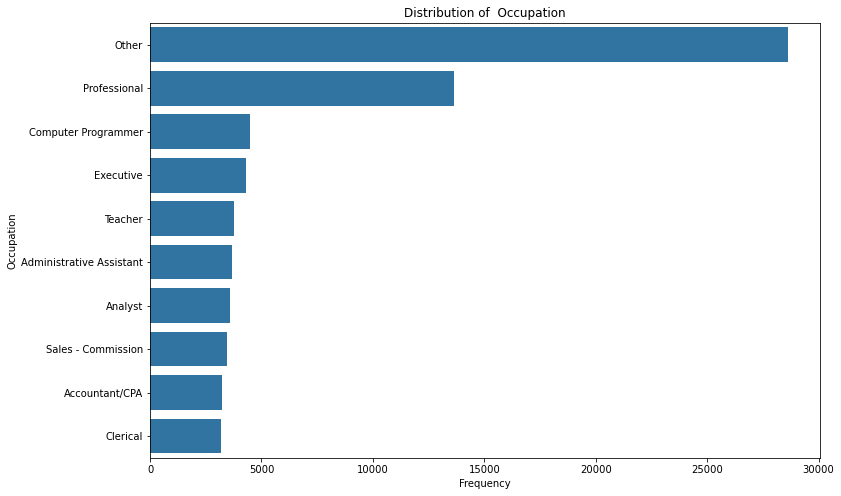

In [16]:
#looking at occupation of borrowers
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
order = loan_sub['Occupation'].value_counts().iloc[:10].index
sb.countplot(data= loan_sub, y= 'Occupation', color = color_pal, order = order)
plt.title("Distribution of  Occupation")
plt.xlabel("Frequency")
plt.ylabel("Occupation")
;

* Alot of the borrowers had occupations outside the 9 occupation options

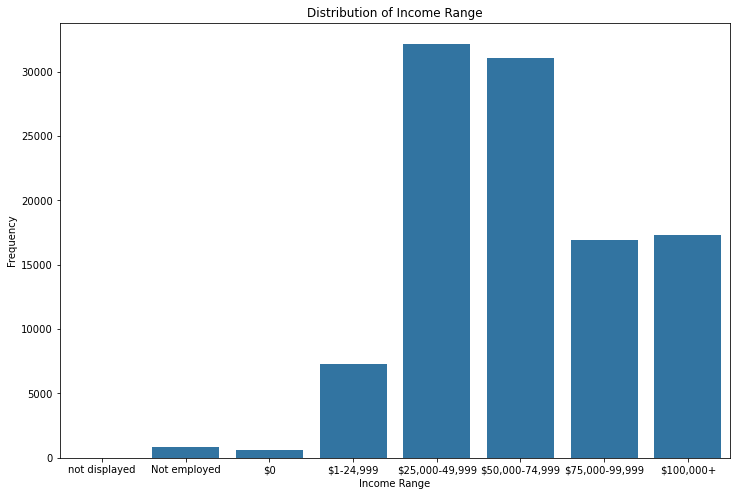

In [17]:
#checking their income ranges
# Creating a barchart to show the distribution of IncomeRange 
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
order_type = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
sb.countplot(data= loan_sub, x= 'IncomeRange', color = color_pal, order = order_type)
plt.title("Distribution of Income Range")
plt.xlabel("Income Range")
plt.ylabel("Frequency");

* Most of the borrowers have income between the range of ($)25,000-74,999

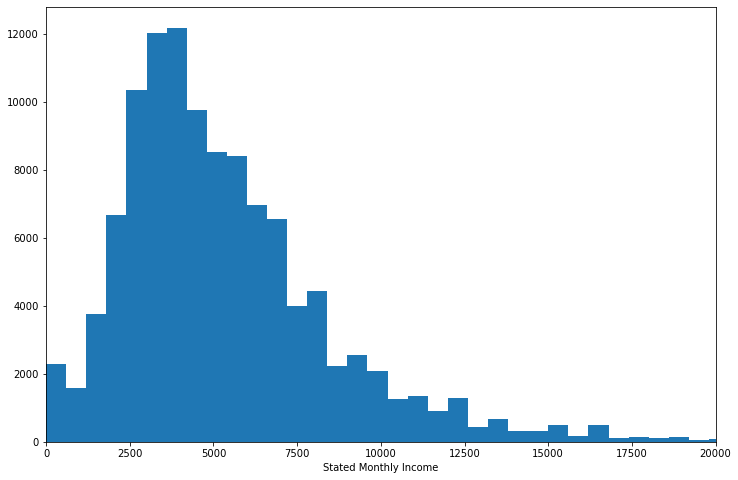

In [18]:
# creating an Histogram to show the distribution of the Borrower's Stated Monthly Income
plt.figure(figsize = [12, 8])
bin= np.arange(0, loan_sub['StatedMonthlyIncome'].max()+600, 600)
plt.hist(data= loan_sub, x = 'StatedMonthlyIncome', bins= bin)
plt.xlim(0, 20000)
plt.xlabel('Stated Monthly Income');

* The distribution of stated monthly income is severely right skrewed, with most of stated monthly income less than 30k

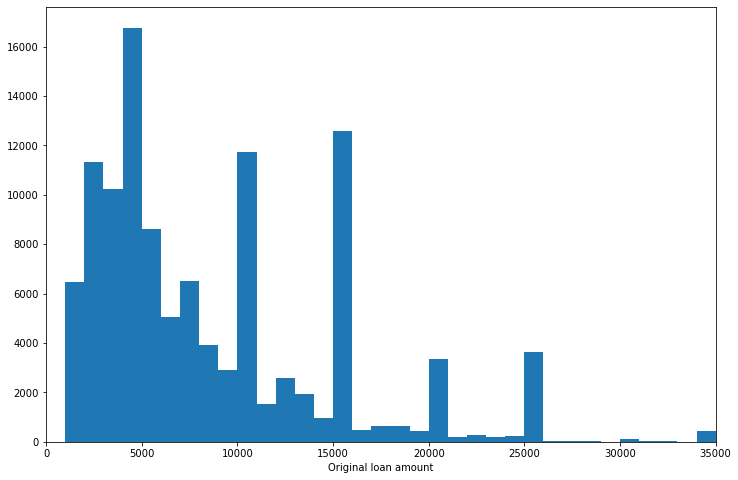

In [19]:
# creating an Histogram to show the distribution of the original loan amount
plt.figure(figsize = [12, 8])
bin= np.arange(0, loan_sub['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data= loan_sub, x = 'LoanOriginalAmount', bins= bin)
plt.xlim(0, 35000)
plt.xlabel('Original loan amount');

* The original loan amount distribution has very large spikes in frequency at 10k, 15k, 20k, 25k.

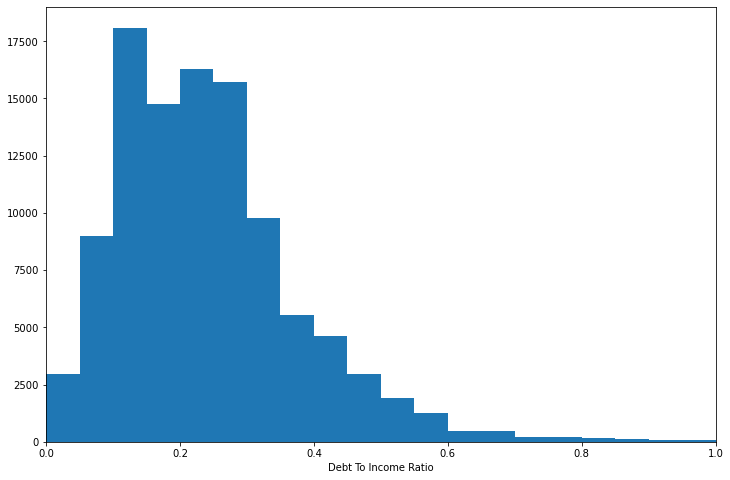

In [21]:
# creating an Histogram to show the distribution of the Borrower's DebtToIncomeRatio
plt.figure(figsize = [12, 8])
bin= np.arange(0, loan_sub['DebtToIncomeRatio'].max()+0.05, 0.05)
plt.hist(data= loan_sub, x = 'DebtToIncomeRatio', bins= bin)
plt.xlim(0, 1)
plt.xlabel('Debt To Income Ratio');

* Debt to income ratio is highly skewed to the right.

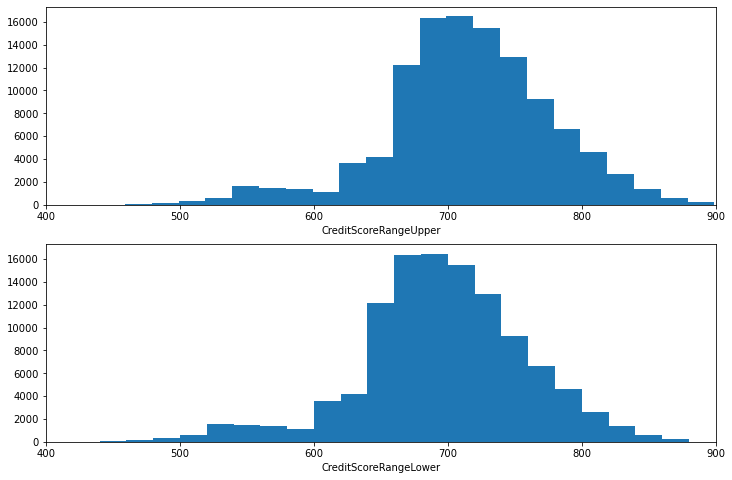

In [22]:
# using subplots, in creating Histograms to show the distribution of the Credit Score Upper and lower Range
fig, ax = plt.subplots(nrows=2, figsize = [12,8])
variables = ['CreditScoreRangeUpper', 'CreditScoreRangeLower']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loan_sub[var]), max(loan_sub[var])+20, 20)
    ax[i].hist(data = loan_sub, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_xlim(400, 900)

plt.show()

* CreditScoreRangeUpper has very similar distribution to CreditScoreRangeLower but 20 points higher.

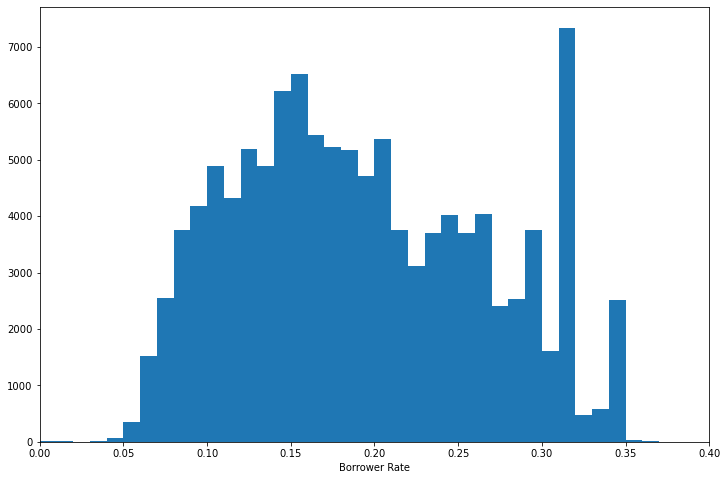

In [23]:
# creating an Histogram to show the distribution of the Borrower's Rate
plt.figure(figsize = [12, 8])
bin= np.arange(0, loan_sub['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data= loan_sub, x = 'BorrowerRate', bins= bin)
plt.xlim(0, 0.4)
plt.xlabel('Borrower Rate');

''

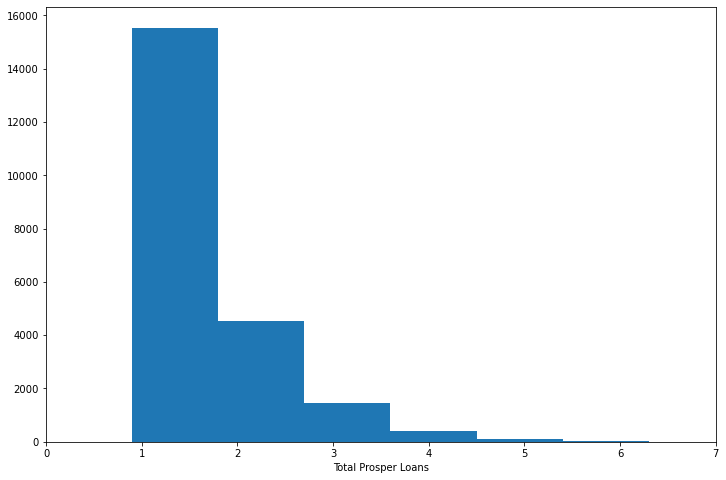

In [24]:
# creating an Histogram to show the distribution of Borrower's Total loans from Prosper
plt.figure(figsize = [12, 8])
bin= np.arange(0, loan_sub['TotalProsperLoans'].max()+0.9, 0.9)
plt.hist(data= loan_sub, x = 'TotalProsperLoans', bins= bin)
plt.xlim(0, 7)
plt.xlabel('Total Prosper Loans')
;

* It appears that most borrowers who apply for a loan have only a single prosper loan

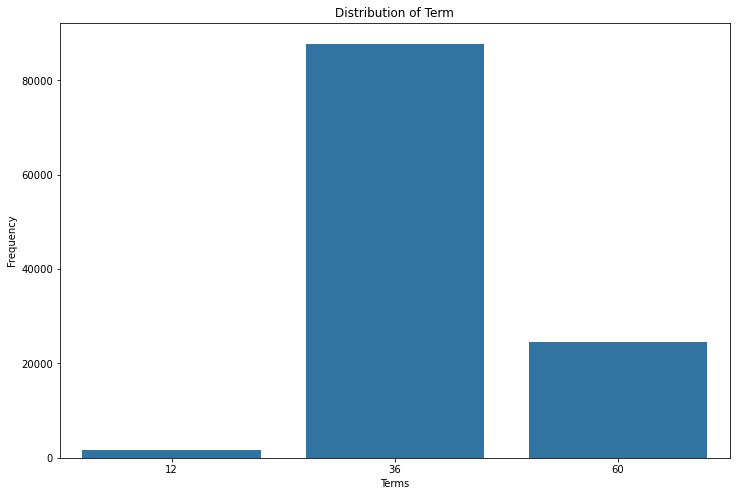

In [25]:
#creating bar chart to show the loan terms distribution
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
order_type = [12, 36, 60]
sb.countplot(data= loan_sub, x= 'Term', color = color_pal, order = order_type)
plt.title("Distribution of Term")
plt.xlabel("Terms")
plt.ylabel("Frequency");

* The length of most of the loans are 36 months.

In [26]:
# creating month and year columns from LoanOriginationDate
loan_sub['Month']= pd.DatetimeIndex(loan_sub['LoanOriginationDate']).month
loan_sub['Year']= pd.DatetimeIndex(loan_sub['LoanOriginationDate']).year

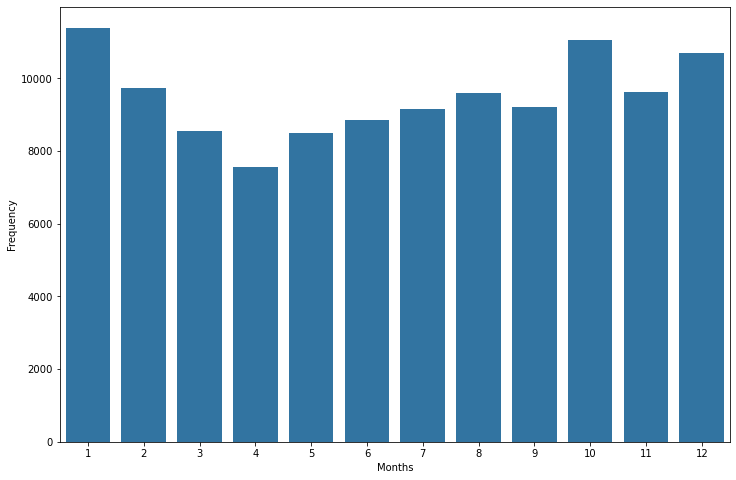

In [27]:
#creating bar chart to show the distribution of loans across months
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
sb.countplot(data= loan_sub, x= 'Month', color = color_pal)
plt.xlabel("Months")
plt.ylabel("Frequency");

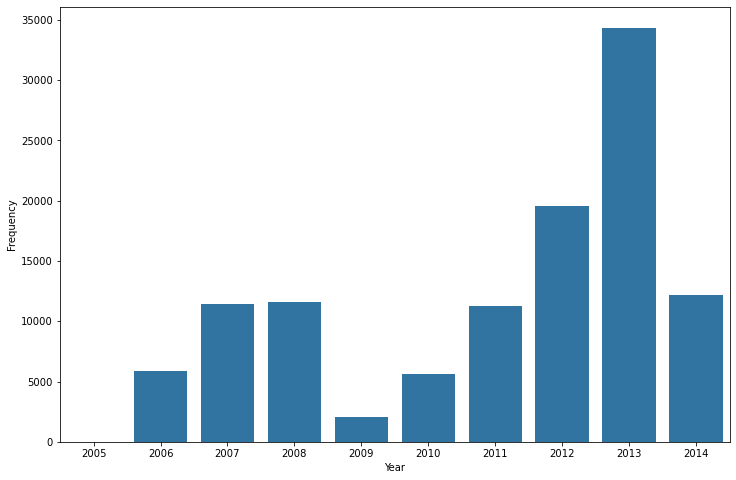

In [28]:
#creating bar chart to show the years distribution 
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
sb.countplot(data= loan_sub, x= 'Year', color = color_pal)

plt.xlabel("Year")
plt.ylabel("Frequency");

* Majority of the loans were taken in 2013

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

To summarize our variables of interest, I looked at Borrower's state and discovered CA has the highest borrowers. I looked at the borrower's employment status and discovered majority of them are employed and fulltime, I also looked at their occupation distribution as well as their income range which mostly ranges from ($)25,000-74,999. Their monthly income distribution is skewed to the right and they are usually less than 30k. Their income ratio is right skewed. The credit score range lower and upper are 20 points different. Most of the loans have a loan term of 36 months, instead of 12 or 60 months.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I extracted the months and years of the loans from the loan original date and I discovered alot of loans were taken in 2013.

### Bivariate Exploration

In this section, I investigated the relationships between pairs of variables of interest in the data.

In [29]:
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   MemberKey               113937 non-null  object 
 1   EmploymentStatus        111682 non-null  object 
 2   Occupation              110349 non-null  object 
 3   IncomeVerifiable        113937 non-null  bool   
 4   StatedMonthlyIncome     113937 non-null  float64
 5   IncomeRange             113937 non-null  object 
 6   BorrowerAPR             113912 non-null  float64
 7   BorrowerRate            113937 non-null  float64
 8   BorrowerState           108422 non-null  object 
 9   DebtToIncomeRatio       105383 non-null  float64
 10  IsBorrowerHomeowner     113937 non-null  bool   
 11  CreditScoreRangeLower   113346 non-null  float64
 12  CreditScoreRangeUpper   113346 non-null  float64
 13  LoanStatus              113937 non-null  object 
 14  LoanKey             

In [30]:
#changing term, month and year to object
loan_sub['Term']=loan_sub['Term'].astype(object)
loan_sub['Month']=loan_sub['Month'].astype(object)
loan_sub['Year']=loan_sub['Year'].astype(object)

In [31]:
# numeric and categorical variables
numeric_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerRate']
categoric_vars = ['IncomeRange', 'EmploymentStatus', 'Term', 'Year', 'IsBorrowerHomeowner']

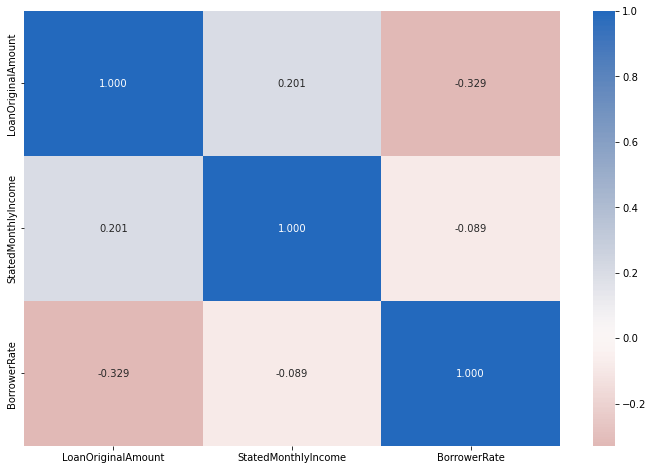

In [32]:
# showing correlation using a heatmap plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

* The correlation between statedmonthly income and loan original amount is 0.201
* The correlation between statedmonthly income and borrower rate is -0.089.
* The correlation between Loan original amount and borrower rate is - 0.329

loan_sub.shape= (113937, 22)
loan_sub_samp.shape= (500, 22)


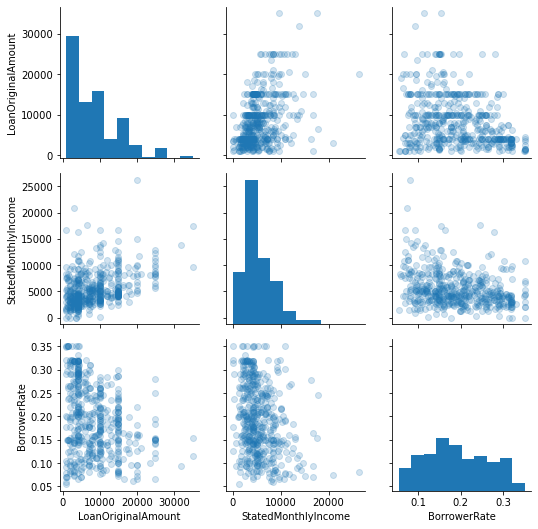

In [33]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("loan_sub.shape=",loan_sub.shape)
loan_sub_samp = loan_sub.sample(n=500, replace = False)
print("loan_sub_samp.shape=",loan_sub_samp.shape)

g = sb.PairGrid(data = loan_sub_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 10);
g.map_offdiag(plt.scatter , alpha = 1/5);

* The loan original amount is positively correlated with the stated monthly income.
* The borrowerRate is negatively correlated with loan amount.

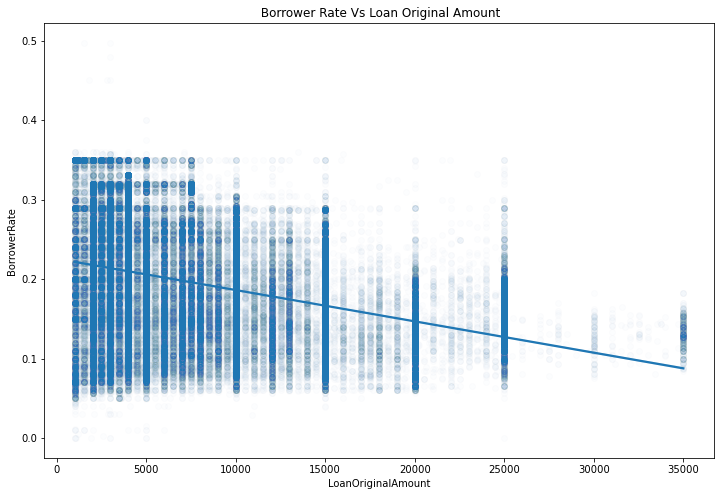

In [34]:
# looking at how borrowerRate and loan original amount are related to one another for all of the data
plt.figure(figsize = [12, 8])
sb.regplot(data = loan_sub, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01})
plt.title(' Borrower Rate Vs Loan Original Amount');

* At different size of the loan amount, the BorrowerRate has a large range, but the range of BorrowerRate decrease with the increase of loan amount.

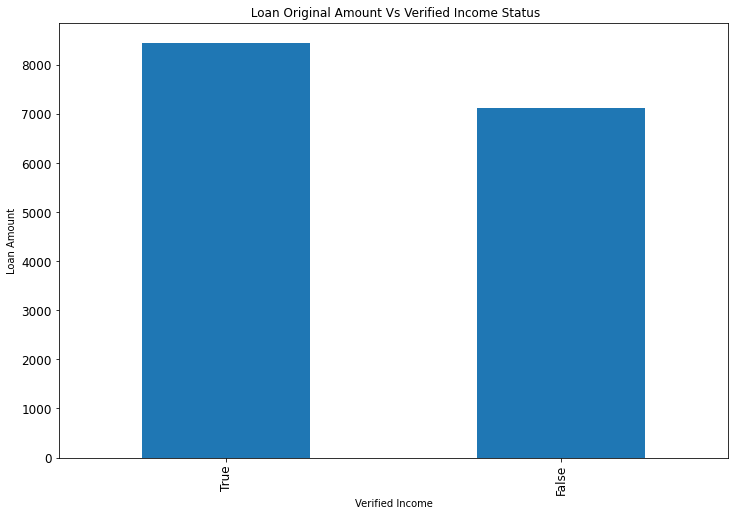

In [35]:
# looking at relationship between borrowers loan original amount and their verifiable income status 
a= loan_sub.groupby('IncomeVerifiable')['LoanOriginalAmount'].mean().sort_values(ascending=False)
plt.figure(figsize = [12, 8])
default_color = sb.color_palette()[0]
a.plot(kind='bar',fontsize=12,color=default_color)
plt.xlabel('Verified Income')
plt.ylabel ('Loan Amount')
plt.title(' Loan Original Amount Vs Verified Income Status');

* From the chart, Borrowers with verified income tend to have a higher average loan amount than borrowers without verified income.

<Figure size 864x576 with 0 Axes>

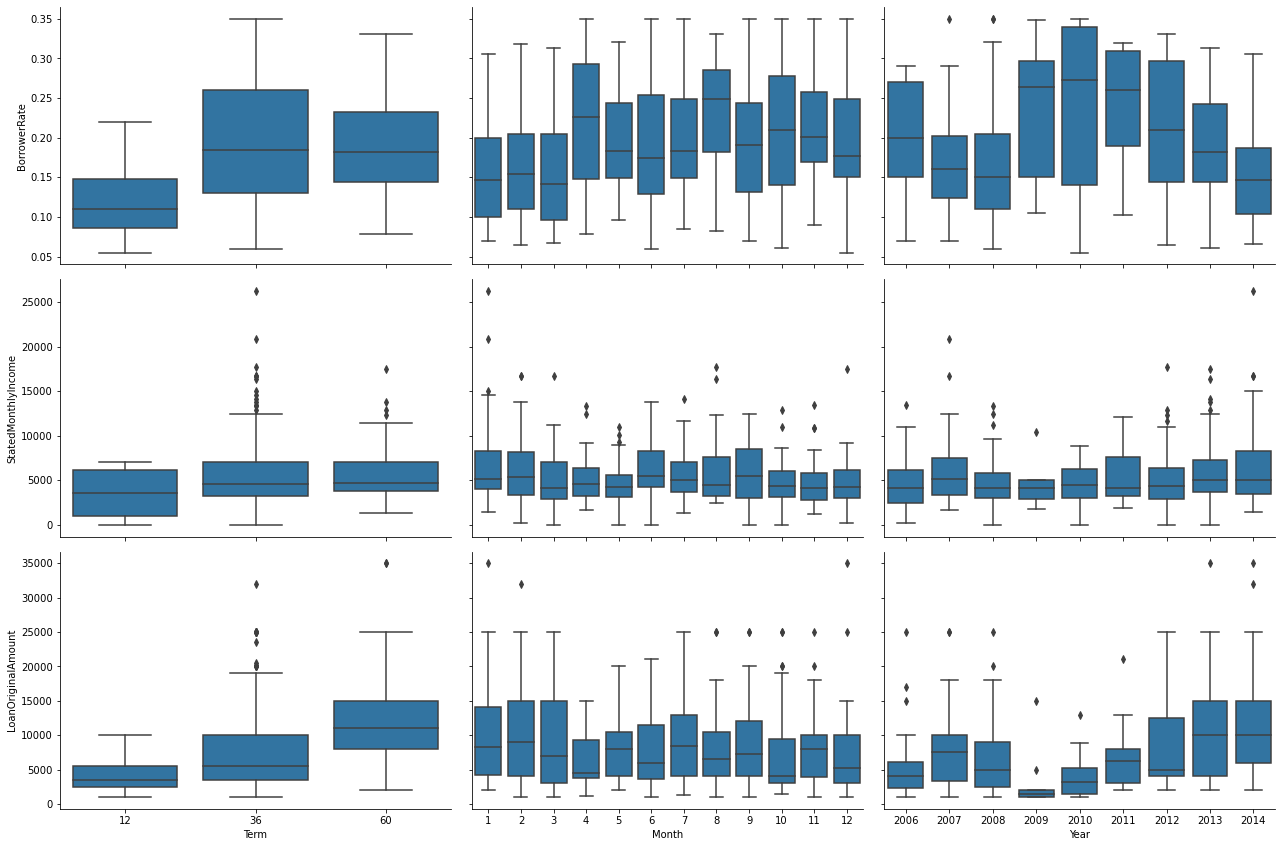

In [36]:
#Looking at how borrower Rate, stated monthly income and loan original amount correlate with the categorical variables.
#plotting matrix of numeric features against categorical features.
categorical_vars = ['Term', 'Month','Year']
#def boxgrid function
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [12, 8])
g = sb.PairGrid(data = loan_sub_samp, y_vars = ['BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = categorical_vars, height = 4, aspect = 1.5)
g.map(boxgrid);

* There is a strong positive relationship between term and loan amount (longer the term, the larger the loan)
* I observed that in 2008-2009 there was a large dip in loan origination that went back up in 2013.

<Figure size 864x576 with 0 Axes>

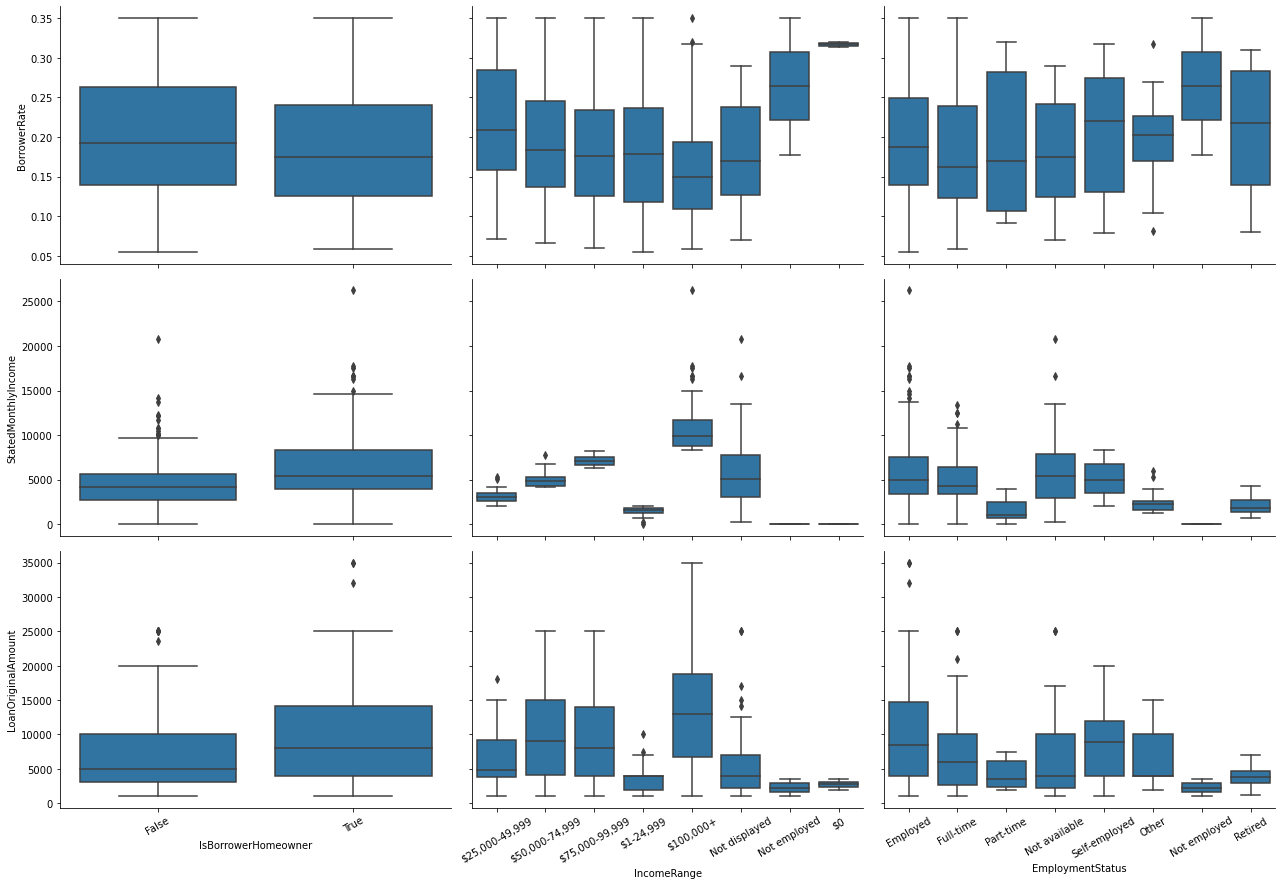

In [38]:
#Let's move on to looking at how borrower Rate, stated monthly income and loan original amount correlate with the categorical variables.
#plotting matrix of numeric features against categorical features.
categorical_vars = [ 'IsBorrowerHomeowner', 'IncomeRange', 'EmploymentStatus']
#def boxgrid function
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=30)

plt.figure(figsize = [12, 8])
g = sb.PairGrid(data = loan_sub_samp, y_vars = ['BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = categorical_vars, height = 4, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=30);

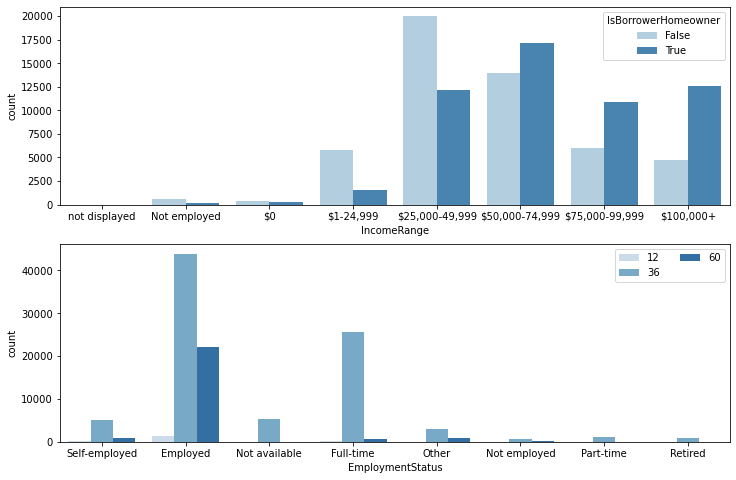

In [39]:
#further investigation into relationship between variables
plt.figure(figsize = [12, 8])
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
# subplot 1: Income Range vs Is BorrowerHomeowner
plt.subplot(2, 1, 1)
sb.countplot(data = loan_sub, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', order=order, palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(2, 1, 2)
sb.countplot(data = loan_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')

ax.legend(loc = 1, ncol = 2); 

* Borrowers with income range from ($)50,000-100,000+ are mostly homeowners
* Borrowers with full time employment status tend to take loans with term duration of 12months
* Employed borrowers tend to take loans of term duration as 36months

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
The borrower interest Rate is negatively correlated with the loan original amount, which mean the more the loan amount, the lower the Borrower Rate. It also shows that at different size of the loan amount, the Rate has a large range, but the range of interest Rate decrease with the increase of loan amount. The loan original amount is positively correlated with the stated monthly income. That is, the higher their stated monthly income, the higher the loan amount borrowed. Borrowers with verified income tend to have a higher average loan amount than borrowers without verified income. Borrowers who are employed and fulltime on average take out larger loans than other groups.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
* Borrowers with income ranging from ($)50,000-100,000+ are majorly homeowners
* Borrowers with full time employment status tend to take loans with term duration of 12months
* Employed borrowers tend to take loans of term duration as 36months
* There is a strong positive relationship between term and loan amount (longer the term, the larger the loan)
* I observed that in 2008-2009 there was a large dip in loan origination that went back up in 2013.

### Multivariate Exploration
Creating plots of three or more variables to investigate the data even further.

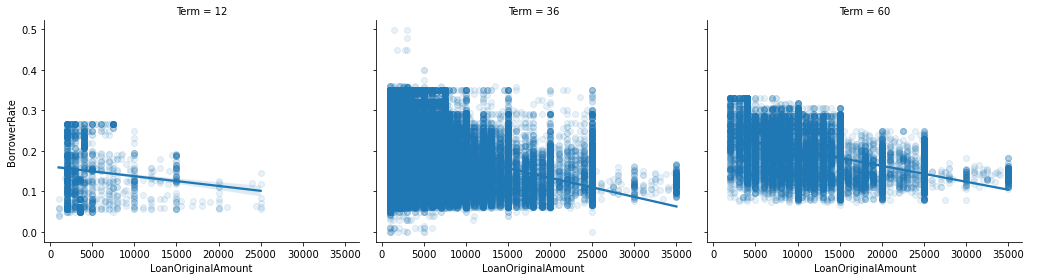

In [40]:
# investigating further the Term effect on relationship of BorrowerRate and loan amount
g=sb.FacetGrid(data=loan_sub, aspect=1.2, height=4, col='Term', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

* Term doesnt really seem to have effect on the relationship between borrower rate and loan original amount

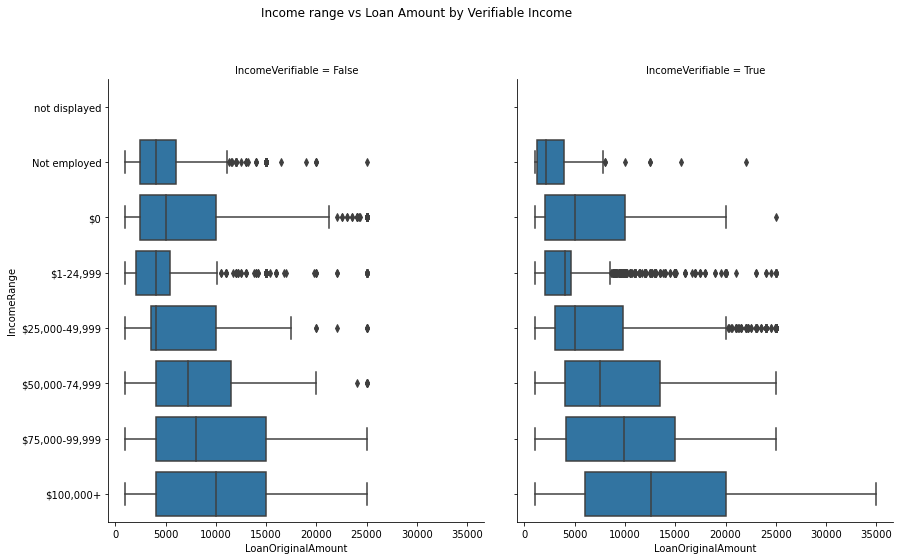

In [41]:
# investigating the effect a verified income has on the relationship between loan original amount and income range
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
box= sb.FacetGrid(data= loan_sub, col = 'IncomeVerifiable', height = 4)
box.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = order)
plt.suptitle('Income range vs Loan Amount by Verifiable Income', y = 1.04)
box.fig.set_size_inches(14,8);

* People who earn ($)100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes tend to get higher loan amounts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
* Term does'nt really seem to have effect on the relationship between borrower rate and loan original amount

### Were there any interesting or surprising interactions between features?
* People who earn ($)100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes tend to get higher loan amounts

### Conclusions

For this exploratory analysis, my main interest was to analyze the borrowers information for relationship insights with the loans they took.

Exploring the distribution of uni variables of interest, one of the insightful information discovered was that CA State has the highest borrowers. Looking at Borrower's employment status, I discovered majority of the borrowers have either employed or fulltime employment status. Investigating further into their source of income, I discovered that their income mostly ranges from 25,000-74,999 and their monthly income distribution is skewed to the right and they are usually less than 30k. Their income ratio is right skewed as well. Looking at the loan terms, they were either for a period of 12, 36 or 60 months. Most of the loans have a loan term of 36 months. Investigating further, I extracted the months and years of the loans from the loan original date and I discovered alot of loans were taken in 2013 and I think this is an important insight to investigate further.

Investigating further to observe the relationships between 2 variables each of the data, I discovered that the borrower interest Rate is negatively correlated with the loan original amount, which mean the more the loan amount, the lower the Borrower Rate. It also shows that at different size of the loan amount, the Rate has a large range, but the range of interest Rate decrease with the increase of loan amount. looking at the monthly income of borrowers, I discovered that the loan original amount is positively correlated with the stated monthly income. That is, the higher their stated monthly income, the higher the loan amount borrowed. Also, Borrowers with verified income tend to have a higher average loan amount than borrowers without verified income. Borrowers with income ranging from ($)50,000-100,000+ are majorly homeowners. Borrowers who are employed and fulltime on average take out larger loans than other groups. There is a strong positive relationship between term and loan amount (longer the term, the larger the loan). Also, Employed borrowers tend to take loans of term duration as 36months while Borrowers with full time employment status tend to take loans with term duration of 12months. Looking at loan origination over years, I observed that in 2008-2009 there was a large dip in loan origination that went back up in 2013.

Investigating further using multiple variables, I realized that loan Term did'nt really seem to have effect on the relationship between borrower rate and loan original amount. Also checked if verified income has an effect on the loan original amount and relationship with income range. Then I discovered that People who earn ($)100,000+ and have verified their income tend to get larger loan original

One challenge faced was deciding what features of interest to focus on as the prosper loan dataset has 81 features. Stackoverflow was refrenced for some code tips. 